In [75]:
import numpy as np
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../scores')
from interactions import *
from pdpbox import pdp
import pandas as pd
import os
from scipy.stats import random_correlation
from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
font = {'family' : 'normal',
        'size'   : 13}
matplotlib.rc('font', **font)
size_small = 10

In [169]:
hr = np.loadtxt('bike_heatmap_results/hr_curve.csv')
holiday = np.loadtxt('bike_heatmap_results/holiday_curve.csv')
hum = np.loadtxt('bike_heatmap_results/hum_curve.csv')
temp = np.loadtxt('bike_heatmap_results/temp_curve.csv')
windspeed = np.loadtxt('bike_heatmap_results/windspeed_curve.csv')
mnth = np.loadtxt('bike_heatmap_results/mnth_curve.csv')

holiday_vs_hr = np.loadtxt('bike_heatmap_results/hr_holiday_grid.csv', delimiter=',')
temp_vs_holiday = np.loadtxt('bike_heatmap_results/temp_holiday_grid.csv', delimiter=',')
temp_vs_windspeed = np.loadtxt('bike_heatmap_results/temp_windspeed_grid.csv', delimiter=',')
mnth_vs_hum = np.loadtxt('bike_heatmap_results/mnth_hum_grid.csv', delimiter=',')

**holiday vs hours**

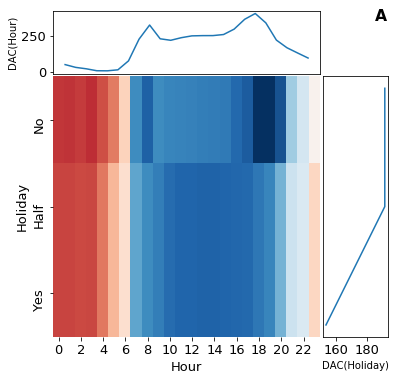

In [170]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 4

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(c1)
plt.ylabel('DAC(Hour)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])
cmap = sns.color_palette("RdBu", n_colors=1000)
im = sns.heatmap(c, vmin=0, vmax=300, cmap=cmap, cbar=False)
ax2.set_yticklabels(["No", "Half", "Yes"])
plt.xticks(np.arange(0, 24, 2) + 0.5, labels=np.arange(0, 24, 2))
plt.xlabel('Hour')
plt.ylabel('Holiday')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(c2, range(len(c2))[::-1])
plt.xlabel('DAC(Holiday)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('A', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.savefig('hr_holiday.pdf')

**temp vs windspeed**

In [166]:
temp_holiday.shape

(10, 3)

# appendix figs

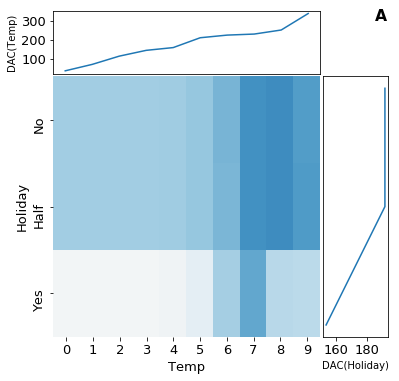

In [168]:
plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(20, 20)
topheight = 4
rightwidth = 4

# top plot
ax1 = plt.subplot(gs[:topheight, :-rightwidth])
plt.xticks([])
plt.plot(temp)
plt.ylabel('DAC(Temp)', fontsize=size_small)


ax2 = plt.subplot(gs[topheight:, :-rightwidth])
cmap = sns.color_palette("RdBu", n_colors=1000)
im = sns.heatmap(temp_holiday.T, vmin=0, vmax=300, cmap=cmap, cbar=False)
ax2.set_yticklabels(["No", "Half", "Yes"])
# plt.xticks(np.arange(0, 24, 2) + 0.5, labels=np.arange(0, 24, 2))
plt.xlabel('Temp')
plt.ylabel('Holiday')


ax3 = plt.subplot(gs[topheight:, -rightwidth:])
plt.yticks([])
plt.plot(c2, range(len(c2))[::-1])
plt.xlabel('DAC(Holiday)', fontsize=size_small)

plt.subplot(gs[1, -1])
plt.title('A', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.savefig('hr_holiday.pdf')

# generate color bar

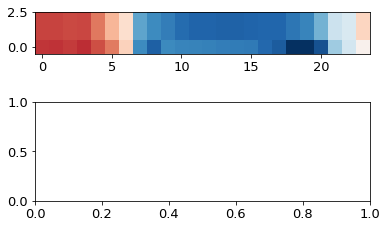

In [130]:
from matplotlib.colors import LinearSegmentedColormap
fig, axes = plt.subplots(2, 1)
colors = sns.color_palette("RdBu", n_colors=1000)# [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
ax = axes[0]
im_cbar = ax.imshow(c, vmin=0, vmax=300, interpolation='nearest', origin='lower', cmap=cm)
# fig.colorbar(im_cbar, ax=ax)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(0.5, 4), dpi=300)
ax = plt.gca()
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1000%")

cb = plt.colorbar(im_cbar, cax=cax, pad=0)
cb.ax.tick_params(labelsize=8) 
cb.outline.set_visible(False)
# plt.tight_layout()
plt.savefig('superheat_cbar.png')